# Lead Scoring Case Study

### **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Reading and Understanding the data

In [1923]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [1924]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1925]:
#read csv file
xed=pd.read_csv("Leads.csv")

In [1926]:
#first five rows of csv file
xed.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1927]:
#no of rows and columns of df
xed.shape

(9240, 37)

In [1928]:
#descriptive statistics of df
xed.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1929]:
#dtypes of df columns
xed.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [1930]:
#df information
xed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1931]:
#distinct elements of each column in df
xed.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1932]:
#sum of null values in df
xed.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

### Data Cleaning and Preparation

In [1933]:
#drop columns with more than 3000 missing values
for c in xed.columns:
    if xed[c].isnull().sum()>3000:
        xed.drop([c],1,inplace=True)

In [1934]:
#no of rows and columns
xed.shape

(9240, 31)

In [1935]:
#sum of null values in df
xed.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity                               0
A free copy of Mastering The

In [1936]:
# we will drop the city and country columns as they are not needed for our analysis
xed.drop(['City','Country'],1,inplace=True)

In [1937]:
#shape of df
xed.shape

(9240, 29)

In [1938]:
#the value counts for each categorical column
for c in xed:
    print(xed[c].astype("category").value_counts())

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

### Here, we drop columns that have highly imbalanced data or irrelevant columns that are not helpful for purposes

In [1939]:
#drop irrelevant columns
df=xed.drop(['Do Not Call','Do Not Email','How did you hear about X Education','What matters most to you in choosing a course',
'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
         'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
          'Lead Profile','I agree to pay the amount through cheque'],1)

In [1940]:
#df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          7802 non-null   object 
 10  What is your current occupation         6550 non-null   obje

In [1941]:
#drop null rows in occupation 
df=df[~pd.isnull(df['What is your current occupation'])]

In [1942]:
#total null values in df
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [1943]:
#shape of df
df.shape

(6550, 13)

In [1944]:
#drop null rows in total visits
df=df[~pd.isnull(df['TotalVisits'])]

In [1945]:
#total null values
df.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [1946]:
#value counts of lead source
df['Lead Source'].value_counts()

Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
WeLearn                 1
testone                 1
Pay per Click Ads       1
Press_Release           1
Name: Lead Source, dtype: int64

In [1947]:
#lead source only has 30 missing values which we impute with the mode of the columns
df['Lead Source']=df['Lead Source'].replace(np.nan,'Google')

In [1948]:
#replacing nan values with select to drop later
df.Specialization=df.Specialization.replace(np.nan,'Select')

In [1949]:
#total null values in df
df.isnull().sum().sort_values(ascending=False)

Last Notable Activity                     0
A free copy of Mastering The Interview    0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Lead Source                               0
Lead Origin                               0
Lead Number                               0
Prospect ID                               0
dtype: int64

In [1950]:
#drop id and number columns as they are not required for our analysis
df.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [1951]:
#shape of df
df.shape

(6420, 11)

In [1952]:
#all categorical columns in one df
df_cat=df.select_dtypes(exclude=['int','float','datetime'])

In [1953]:
#drop specialization column
df_cat.drop('Specialization',1,inplace=True)

In [1954]:
#one hot encoding for categorical columns
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [1955]:
#shape of df
df_cat.shape

(6420, 52)

In [1956]:
#first five rows of df
df_cat.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1957]:
#drop duplicate columns
df.drop(['Lead Origin', 'Lead Source',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview',
       'Last Notable Activity'],1,inplace=True)

In [1958]:
#concatenating df_cat and df 
df=pd.concat([df,df_cat],1)

In [1959]:
#creating dummies for specializaiton columns
temp=pd.get_dummies(df.Specialization,prefix='Specialization')

In [1960]:
#dropping select 
temp=temp.drop(['Specialization_Select'],1)

In [1961]:
#concatenating df and temp
df=pd.concat([df,temp],1)

In [1962]:
#shape of df
df.shape

(6420, 75)

In [1963]:
#drop duplicate specialization column
df.drop('Specialization',1,inplace=True)

### Train Test Split

In [1964]:
#assigning X and y variables
X=df.drop('Converted',1)
y=df['Converted']

In [1965]:
#import train test split
from sklearn.model_selection import train_test_split

In [1966]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [1967]:
#import minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [1968]:
#scaling on training data
sc=MinMaxScaler()
X_train[['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']]=sc.fit_transform(X_train[['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']])

In [1969]:
#first five rows
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
6630,0.047619,0.084332,0.133333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8176,0.047619,0.154461,0.066667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4978,0.095238,0.498447,0.266667,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7457,0.119048,0.085664,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4383,0.142857,0.234798,0.400000,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1970]:
#check conversion rate
xed.Converted.sum()/len(xed.Converted)*100

38.53896103896104

## Correlation Matrix

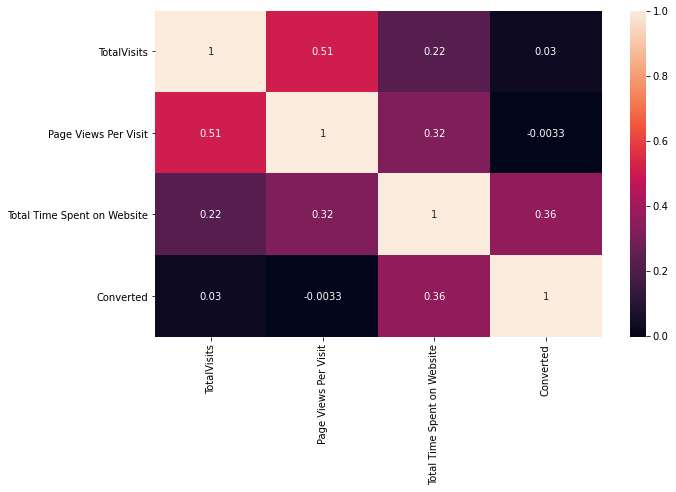

In [2072]:
#correlation between numerical variables
plt.figure(figsize=(10,6))
num_vars=xed[['TotalVisits','Page Views Per Visit','Total Time Spent on Website','Converted']].corr()
sns.heatmap(num_vars,annot=True)
plt.show()

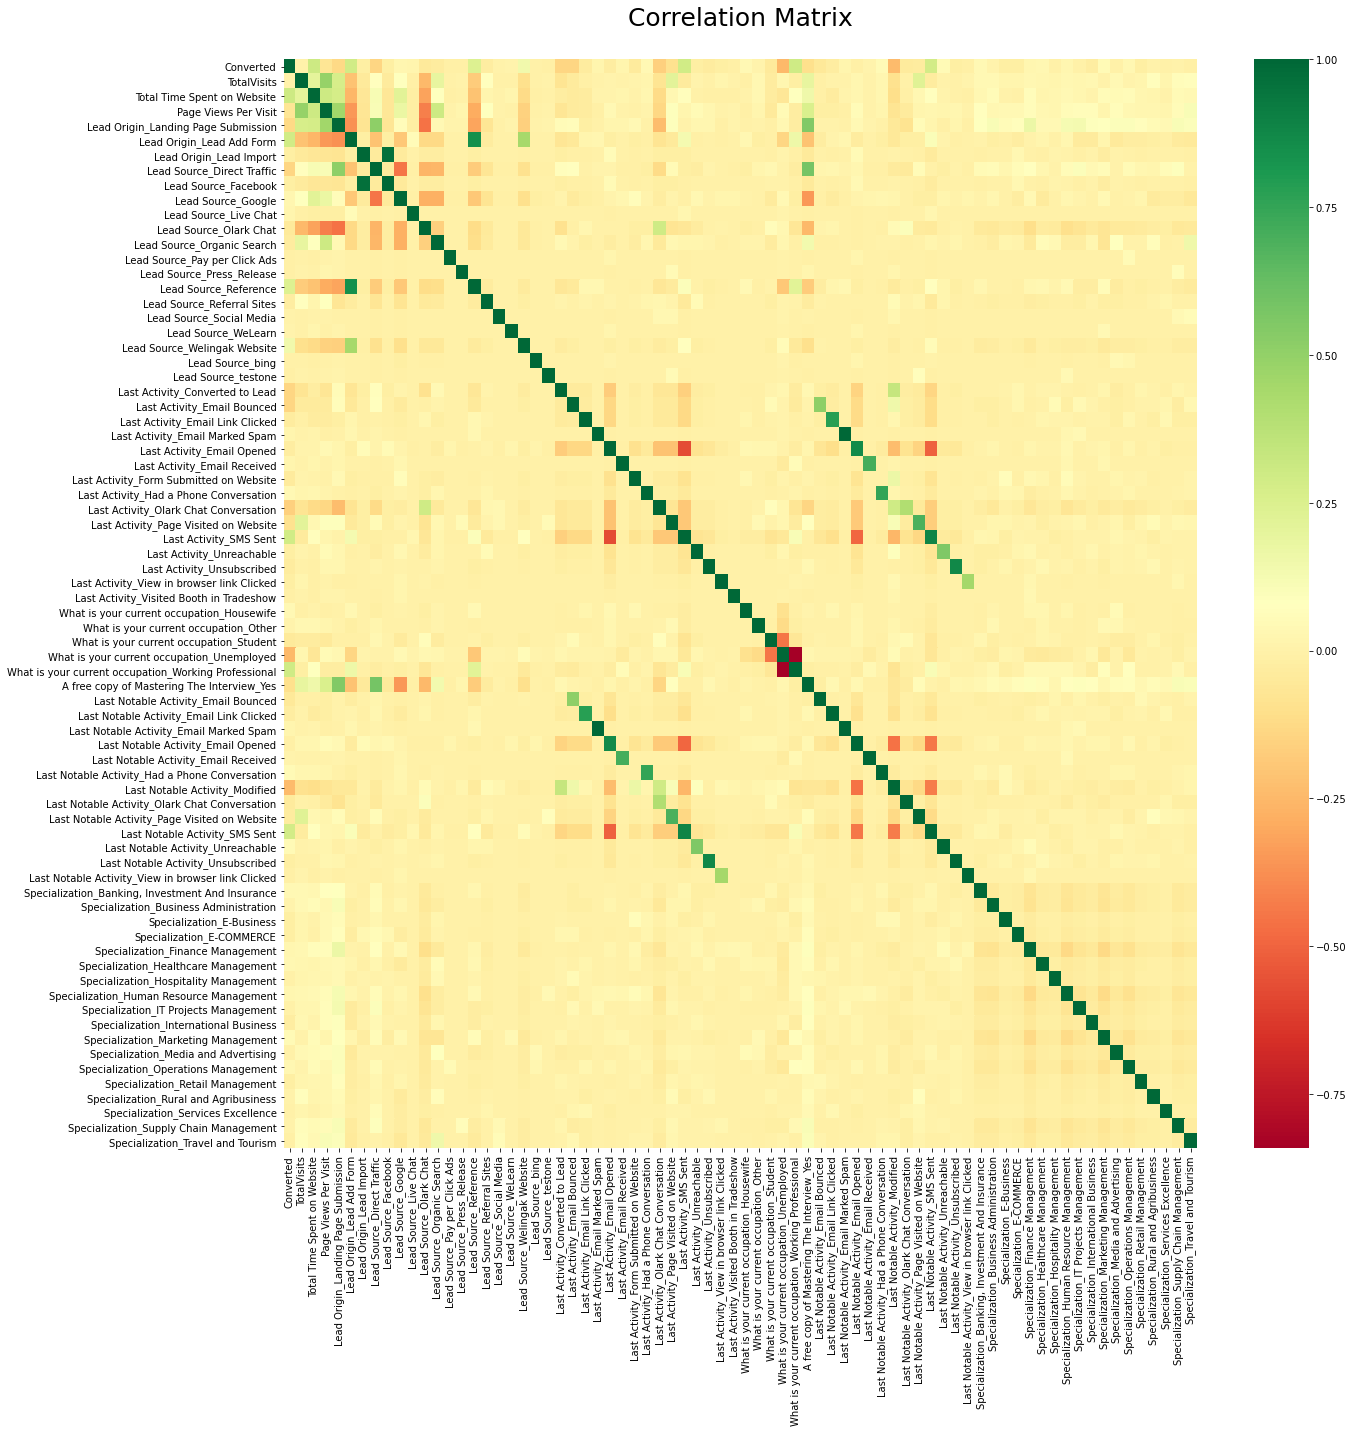

In [2078]:
#correlation heatmap for all variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="RdYlGn")
plt.title("Correlation Matrix\n",fontsize=25)
plt.tight_layout()
plt.show()

### Top 10 correlated features

In [1972]:
#top 10 correlated features
corr_target = X_train.corr()
corr_target = corr_target.where(np.triu(np.ones(corr_target.shape), k=1).astype(np.bool))
corr_target = corr_target.unstack().reset_index().dropna(subset = [0])
corr_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_target['Corr(abs)'] = abs(corr_target['Correlation_Value'])
corr_target.sort_values(by = "Corr(abs)", ascending =False, inplace = True)
corr_target.head(10)

,VAR1,VAR2,Correlation_Value,Corr(abs)
3236,Last Notable Activity_Email Marked Spam,Last Activity_Email Marked Spam,1.000000,1.000000
516,Lead Source_Facebook,Lead Origin_Lead Import,0.971717,0.971717
3754,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.892815,0.892815
3310,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.869488,0.869488
3902,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.850202,0.850202
2959,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,-0.839768,0.839768
1026,Lead Source_Reference,Lead Origin_Lead Add Form,0.836008,0.836008
3162,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.782459,0.782459
3459,Last Notable Activity_Had a Phone Conversation,Last Activity_Had a Phone Conversation,0.726958,0.726958
3680,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.687158,0.687158


## Model Building

In [1973]:
#import logistic regression 
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

### Initial Model

In [1974]:
#import statsmodels
import statsmodels.api as sm

In [1975]:
#add constant and create first model without feature selection
X_train_sm=sm.add_constant(X_train)
logm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1969.4
Date:                Wed, 08 Sep 2021   Deviance:                       3938.8
Time:                        16:41:58   Pearson chi2:                 4.60e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   18.5009   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              3.2575      0.658      4.948      0.000       1.967       4.548
Total Time Spent on Website                              4.5008      0.192     23.422      0.000       4.124       4.877
Page Views Per Visit                                    -1.9997      0.448     -4.463      0.000      -2.878      -1.121
Lead Origin_Landing Page Submission                     -0.6729      0.151     -4.448      0.000      -0.969      -0.376
Lead Origin_Lead Add Form                                3.8437      1.047      3.671      0.000       1.791       5.896
Lead Origin_Lead Import                                 23.2048   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                               2.3954      1.775      1.350      0.177      -1.084       5.874
Lead Source_Facebook                                   -20.0115   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       2.8413      1.769      1.606      0.108      -0.626       6.309
Lead Source_Live Chat                                   23.2038   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   3.9453      1.777      2.220      0.026       0.463       7.428
Lead Source_Organic Search                               2.6289      1.776      1.480      0.139      -0.852       6.110
Lead Source_Pay per Click Ads                         -4.03e-10   1.31e-05  -3.07e-05      1.000   -2.57e-05    2.57e-05
Lead Source_Press_Release                              -18.3244   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    2.1968      1.449      1.516      0.130      -0.644       5.038
Lead Source_Referral Sites                               2.7281      1.809      1.508      0.132      -0.817       6.274
Lead Source_Social Media                                27.1917   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_WeLearn                                   -3.39e-09   8.18e-06     -0.000      1.000    -1.6e-05     1.6e-05
Lead Source_Welingak Website                             4.8539      1.754      2.768      0.006       1.417       8.291
Lead Source_bing                                         3.0747      2.208      1.393      0.164      -1.252       7.401
Lead Source_testone                                    -18.9300   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Converted to Lead                        -24

### Feature Selection with RFE

In [1976]:
#import RFE
from sklearn.feature_selection import RFE

In [2045]:
#first 15 features
rfe=RFE(log,15)
rfe=rfe.fit(X_train,y_train)

In [2046]:
#list and ranking of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Had a Phone Conversation', True, 1),
 ('Last Notable Activity_Unreachable', True, 1)]

In [1979]:
#first 15 ranked columns
col=X_train.columns[rfe.support_]

In [1980]:
#assigning only first 15 features to X_train
X_train=X_train[col]

In [1981]:
#shape of X_train
X_train.shape

(4494, 15)

### Model 1

In [1982]:
#create log model 1 and check summary
X_train_sm=sm.add_constant(X_train[col])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4478
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.2
Date:                Wed, 08 Sep 2021   Deviance:                       4110.4
Time:                        16:42:11   Pearson chi2:                 4.72e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8984      0.222     -8.563      0.000      -2.333      -1.464
TotalVisits                                              2.7970      0.598      4.677      0.000       1.625       3.969
Total Time Spent on Website                              4.5864      0.186     24.677      0.000       4.222       4.951
Page Views Per Visit                                    -1.5142      0.409     -3.699      0.000      -2.316      -0.712
Lead Origin_Lead Add Form                                3.8045      0.256     14.859      0.000       3.303       4.306
Lead Source_Olark Chat                                   1.4838      0.140     10.608      0.000       1.210       1.758
Lead Source_Welingak Website                             2.3037      1.045      2.205      0.027       0.256       4.351
Last Activity_Converted to Lead                         -1.0781      0.233     -4.618      0.000      -1.536      -0.621
Last Activity_Email Bounced                             -2.2637      0.404     -5.602      0.000      -3.056      -1.472
Last Activity_Had a Phone Conversation                   0.6507      0.864      0.754      0.451      -1.042       2.343
Last Activity_Olark Chat Conversation                   -1.2032      0.188     -6.402      0.000      -1.572      -0.835
Last Activity_SMS Sent                                   1.1232      0.085     13.221      0.000       0.957       1.290
What is your current occupation_Unemployed              -0.1903      0.200     -0.954      0.340      -0.581       0.201
What is your current occupation_Working Professional     2.3262      0.270      8.617      0.000       1.797       2.855
Last Notable Activity_Had a Phone Conversation          22.5558   1.29e+04      0.002      0.999   -2.52e+04    2.52e+04
Last Notable Activity_Unreachable                        2.7939      0.798      3.499      0.000       1.229       4.359
========================================================================================================================
"""

In [1983]:
#import vif from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1984]:
#check vif value of all features
VIF=pd.DataFrame()
VIF['Features']=X_train[col].columns
VIF['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
VIF['VIF']=round(VIF['VIF'],2)
VIF=VIF.sort_values('VIF',ascending=False)
VIF

,Features,VIF
11,What is your current occupation_Unemployed,5.94
2,Page Views Per Visit,5.14
0,TotalVisits,3.68
1,Total Time Spent on Website,2.29
8,Last Activity_Had a Phone Conversation,2.13
13,Last Notable Activity_Had a Phone Conversation,2.13
3,Lead Origin_Lead Add Form,1.85
12,What is your current occupation_Working Profes...,1.77
4,Lead Source_Olark Chat,1.75
10,Last Activity_SMS Sent,1.72


In [1985]:
#drop column with high p value from X_train_sm
col=col.drop('Last Notable Activity_Had a Phone Conversation',1)

### Model 2

In [1986]:
#create log model 2 and check summary
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.0
Date:                Wed, 08 Sep 2021   Deviance:                       4117.9
Time:                        16:42:12   Pearson chi2:                 4.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8998      0.222     -8.573      0.000      -2.334      -1.465
TotalVisits                                              2.8043      0.597      4.697      0.000       1.634       3.974
Total Time Spent on Website                              4.5767      0.186     24.651      0.000       4.213       4.941
Page Views Per Visit                                    -1.4948      0.408     -3.661      0.000      -2.295      -0.695
Lead Origin_Lead Add Form                                3.8029      0.256     14.851      0.000       3.301       4.305
Lead Source_Olark Chat                                   1.4857      0.140     10.624      0.000       1.212       1.760
Lead Source_Welingak Website                             2.3069      1.045      2.209      0.027       0.260       4.354
Last Activity_Converted to Lead                         -1.0755      0.233     -4.609      0.000      -1.533      -0.618
Last Activity_Email Bounced                             -2.2611      0.404     -5.598      0.000      -3.053      -1.469
Last Activity_Had a Phone Conversation                   2.2009      0.703      3.132      0.002       0.824       3.578
Last Activity_Olark Chat Conversation                   -1.2026      0.188     -6.401      0.000      -1.571      -0.834
Last Activity_SMS Sent                                   1.1226      0.085     13.220      0.000       0.956       1.289
What is your current occupation_Unemployed              -0.1906      0.199     -0.956      0.339      -0.582       0.200
What is your current occupation_Working Professional     2.3240      0.270      8.611      0.000       1.795       2.853
Last Notable Activity_Unreachable                        2.7923      0.798      3.498      0.000       1.228       4.357
========================================================================================================================
"""

In [1987]:
#check vif values of all features
VIF=pd.DataFrame()
VIF['Features']=X_train.columns
VIF['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
VIF['VIF']=round(VIF['VIF'],2)
VIF=VIF.sort_values('VIF',ascending=False)
VIF

,Features,VIF
11,What is your current occupation_Unemployed,5.94
2,Page Views Per Visit,5.14
0,TotalVisits,3.68
1,Total Time Spent on Website,2.29
8,Last Activity_Had a Phone Conversation,2.13
13,Last Notable Activity_Had a Phone Conversation,2.13
3,Lead Origin_Lead Add Form,1.85
12,What is your current occupation_Working Profes...,1.77
4,Lead Source_Olark Chat,1.75
10,Last Activity_SMS Sent,1.72


In [1988]:
#drop column with high p value and high vif from X_train_sm
col=col.drop('What is your current occupation_Unemployed',1)

### Model 3

In [1989]:
#create model 3 and check summary
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.4
Date:                Wed, 08 Sep 2021   Deviance:                       4118.9
Time:                        16:42:12   Pearson chi2:                 4.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0819      0.114    -18.219      0.000      -2.306      -1.858
TotalVisits                                              2.7979      0.597      4.688      0.000       1.628       3.968
Total Time Spent on Website                              4.5803      0.186     24.675      0.000       4.216       4.944
Page Views Per Visit                                    -1.4958      0.408     -3.665      0.000      -2.296      -0.696
Lead Origin_Lead Add Form                                3.8117      0.256     14.891      0.000       3.310       4.313
Lead Source_Olark Chat                                   1.4892      0.140     10.650      0.000       1.215       1.763
Lead Source_Welingak Website                             2.2917      1.044      2.194      0.028       0.245       4.338
Last Activity_Converted to Lead                         -1.0793      0.233     -4.624      0.000      -1.537      -0.622
Last Activity_Email Bounced                             -2.2571      0.404     -5.583      0.000      -3.050      -1.465
Last Activity_Had a Phone Conversation                   2.1928      0.703      3.121      0.002       0.816       3.570
Last Activity_Olark Chat Conversation                   -1.1976      0.188     -6.381      0.000      -1.565      -0.830
Last Activity_SMS Sent                                   1.1172      0.085     13.192      0.000       0.951       1.283
What is your current occupation_Working Professional     2.5069      0.191     13.158      0.000       2.134       2.880
Last Notable Activity_Unreachable                        2.7864      0.798      3.492      0.000       1.222       4.350
========================================================================================================================
"""

In [1990]:
#check vif of all features
VIF=pd.DataFrame()
VIF['Features']=X_train[col].columns
VIF['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
VIF['VIF']=round(VIF['VIF'],2)
VIF=VIF.sort_values('VIF',ascending=False)
VIF

,Features,VIF
2,Page Views Per Visit,4.08
0,TotalVisits,3.54
1,Total Time Spent on Website,2.03
10,Last Activity_SMS Sent,1.60
3,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.23
9,Last Activity_Olark Chat Conversation,1.19
11,What is your current occupation_Working Profes...,1.19
6,Last Activity_Converted to Lead,1.03


In [1991]:
#predict on train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

6630    0.146561
8176    0.073204
4978    0.766005
7457    0.135282
4383    0.230575
4152    0.628184
406     0.675871
8992    0.053586
1504    0.364524
66      0.876573
dtype: float64

In [1992]:
#reshape y_train_pred values
y_train_pred=y_train_pred.values.reshape(-1)

In [1993]:
#create df and add ID, Converted and Conversion Probability columns
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Conversion Prob":y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head(10)

,Converted,Conversion Prob,Prospect ID
0,0,0.146561,6630
1,0,0.073204,8176
2,0,0.766005,4978
3,0,0.135282,7457
4,0,0.230575,4383
5,0,0.628184,4152
6,1,0.675871,406
7,0,0.053586,8992
8,0,0.364524,1504
9,1,0.876573,66


In [1994]:
#create predicted column with higher than 0.5 conversion probability as predicted to be converted
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [1995]:
#first five rows of y_train_pred
y_train_pred_final.head()

,Converted,Conversion Prob,Prospect ID,Predicted
0,0,0.146561,6630,0
1,0,0.073204,8176,0
2,0,0.766005,4978,1
3,0,0.135282,7457,0
4,0,0.230575,4383,0


### Metrics


In [1996]:
#import metrics
from sklearn import metrics

In [1997]:
#create confusion matrix for Converted and Predicted
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1950  391]
 [ 545 1608]]


In [1998]:
#import accuracy score
from sklearn.metrics import accuracy_score

In [1999]:
#print accuracy score
print(accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7917222963951935


In [2000]:
#assign confusion matrix values
TP=confusion[1,1]#true positive
TN=confusion[0,0]#true negative
FP=confusion[0,1]#false positive
FN=confusion[1,0]#false negative

In [2001]:
#calculate sensitivity/recall
TP/(TP+FN)

0.7468648397584765

In [2002]:
#precision
TP/(TP+FP)

0.8044022011005503

In [2003]:
#calculate specificity
TN/(TN+FP)

0.8329773601025203

In [2004]:
#calculate false positive rate
FP/(FP+TN)

0.1670226398974797

### ROC curve

In [2005]:
#create function to draw roc curve
def draw_roc(actual, probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC Curve (area= %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate or [1-True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Example")
    plt.legend()
    plt.show()

In [2006]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final['Conversion Prob'],
                                    drop_intermediate=False)

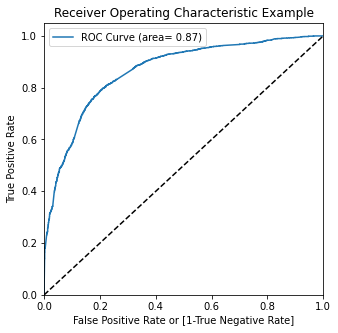

In [2007]:
#call roc function
draw_roc(y_train_pred_final.Converted,y_train_pred_final['Conversion Prob'])

### Finding optimal cutoff point

In [2008]:
#create columns with different prob cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.146561,6630,0,1,1,0,0,0,0,0,0,0,0
1,0,0.073204,8176,0,1,0,0,0,0,0,0,0,0,0
2,0,0.766005,4978,1,1,1,1,1,1,1,1,1,0,0
3,0,0.135282,7457,0,1,1,0,0,0,0,0,0,0,0
4,0,0.230575,4383,0,1,1,1,0,0,0,0,0,0,0


In [2009]:
#calculate accuracy, specificity, and sensitivity for different cutoff points
cutoff_df=pd.DataFrame(columns=['prob','accuracy','spec','sens'])

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    
    spec=cm1[0,0]/(cm1[0,0]+cm1[1,0])
    sens=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i,accuracy,spec,sens]
    
print(cutoff_df)

     prob  accuracy      spec      sens
0.0   0.0  0.479083       NaN  1.000000
0.1   0.1  0.548287  0.948127  0.991640
0.2   0.2  0.710280  0.898695  0.938690
0.3   0.3  0.761015  0.878209  0.905248
0.4   0.4  0.791945  0.813559  0.805852
0.5   0.5  0.791722  0.781563  0.746865
0.6   0.6  0.779706  0.748437  0.682304
0.7   0.7  0.741878  0.689081  0.549001
0.8   0.8  0.712506  0.653497  0.450070
0.9   0.9  0.646417  0.597460  0.278681


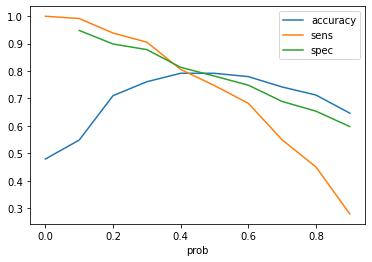

In [2010]:
#plotting the accuracy sensitivity and specificity for the cutoff points
cutoff_df.plot.line(x='prob', y=['accuracy','sens','spec'])
plt.show()

Hence, we will take 0.45 as the cutoff point for our purposes

In [2011]:
#taking cutoff as 0.5 for final predicted
y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion Prob'].map( lambda x: 1 if x > 0.45 else 0)

In [2012]:
#first five rows of y_train_pred_final
y_train_pred_final.head()

,Converted,Conversion Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.146561,6630,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.073204,8176,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.766005,4978,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.135282,7457,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.230575,4383,0,1,1,1,0,0,0,0,0,0,0,0


In [2013]:
#confusion matrix with new cutoff point
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion2)

[[1895  446]
 [ 483 1670]]


In [2014]:
#assigning confusion matrix values
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2015]:
#calculate sensitivity/recall
TP / (TP+FN)

0.7756618671620994

In [2016]:
#calculate specificity
TN / (TN+FP)

0.8094831268688595

In [2017]:
#calculate Precision
TP/(TP+FP)

0.7892249527410208

In [2018]:
#accuracy
print(accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted))

0.7932799287939475


### Precision Recall Curve

In [2019]:
#import precision recall curve
from sklearn.metrics import precision_recall_curve

In [2020]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Conversion Prob'])

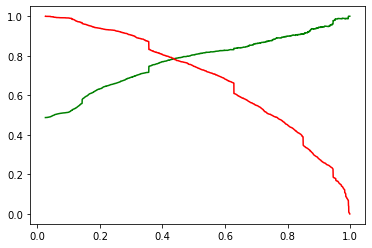

In [2021]:
#plot precision recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on Test Set

In [2022]:
#scale X_test data with minmaxscaler
X_test[['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']]=sc.transform(X_test[['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']])

In [2023]:
#final model's columns to x_test data
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
4051,0.095238,0.676431,0.133333,0,0,0,0,0,0,0,0,0,0
1696,0.071429,0.356414,0.200000,0,0,0,0,0,0,0,0,0,0
1325,0.214286,0.536174,0.600000,0,0,0,0,0,0,0,0,0,0
7991,0.071429,0.764314,0.100000,0,0,0,0,0,0,0,1,0,0
8177,0.071429,0.456724,0.200000,0,0,0,0,0,0,0,1,0,0


In [2024]:
#adding constant
X_test_sm = sm.add_constant(X_test)

In [2025]:
#predicting on test data
y_test_pred = res.predict(X_test_sm)

In [2026]:
#first ten rows
y_test_pred[:10]

4051    0.747131
1696    0.366158
1325    0.518992
7991    0.929975
8177    0.736507
404     0.680163
6682    0.047351
5575    0.849392
5930    0.107078
8723    0.156490
dtype: float64

In [2027]:
#converting y_pred to a df
y_pred_1 = pd.DataFrame(y_test_pred)

In [2028]:
#first five rows
y_pred_1.head()

,0
4051,0.747131
1696,0.366158
1325,0.518992
7991,0.929975
8177,0.736507


In [2029]:
#converting y_test to a df
y_test_df = pd.DataFrame(y_test)

In [2030]:
# Id column for test data
y_test_df['ID'] = y_test_df.index

In [2031]:
# dropping index for both df 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2032]:
# concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2033]:
# renaming the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion Prob'})

In [2034]:
#first five rows
y_pred_final.head()

,Converted,ID,Conversion Prob
0,0,4051,0.747131
1,1,1696,0.366158
2,0,1325,0.518992
3,0,7991,0.929975
4,1,8177,0.736507


In [2061]:
#final predicted column with cutoff of 0.45
y_pred_final['final_predicted'] = y_pred_final['Conversion Prob'].map(lambda x: 1 if x > 0.45 else 0)

In [2073]:
#first five rows of df
y_pred_final.head()

,Converted,ID,Conversion Prob,final_predicted
0,0,4051,0.747131,1
1,1,1696,0.366158,0
2,0,1325,0.518992,1
3,0,7991,0.929975,1
4,1,8177,0.736507,1


In [2062]:
#accuracy score
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7824506749740394

In [2063]:
#confusion matrix for test data with 0.45 cutoff
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3


array([[781, 207],
       [212, 726]])

In [2064]:
#assigning confusion matrix values
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [2065]:
#calculating sensitivity/recall
TP / (TP+FN)

0.7739872068230277

In [2066]:
#calculating specificity
TN / (TN+FP)

0.7904858299595142

In [2067]:
#calculate precision
TP/(TP+FP)

0.7781350482315113

In [2068]:
#checking the classification report
print(metrics.classification_report(y_pred_final.Converted, y_pred_final.final_predicted))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79       988
           1       0.78      0.77      0.78       938

    accuracy                           0.78      1926
   macro avg       0.78      0.78      0.78      1926
weighted avg       0.78      0.78      0.78      1926



### Lead Score

In [2076]:
y_pred_final['Lead Score']=round((y_pred_final['Conversion Prob']*100),2)

In [2077]:
y_pred_final.head()

,Converted,ID,Conversion Prob,final_predicted,Lead Score
0,0,4051,0.747131,1,74.71
1,1,1696,0.366158,0,36.62
2,0,1325,0.518992,1,51.90
3,0,7991,0.929975,1,93.00
4,1,8177,0.736507,1,73.65
